In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-e0k97f8a because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Lesson 11: Principal Component Analysis

<img src="pca_gauss.png" width="400px">
<center><small>(Nicoguaro - Own work, CC BY 4.0, https://commons.wikimedia.org/w/index.php?curid=46871195)</small></center>

In machine learning and data science, Principal Component Analysis (PCA) is a method of analyzing datasets to obtain an orthogonal basis that best captures most of the variance of our data.  It is often used to remove extra features or dimensions in large-dimensional datasets, because in a similar vein to SVD, PCA will give us a set of axes with both large contributions and small contributions to our data.

We will define the dataset ${\bf X}$ as a $m \times n$ matrix, where the rows have the different data entries, and the columns have the features of each entry.

For some dataset ${\bf X}$, the **Principal Components are defined as the eigenvectors of the dataset's _covariance matrix_**.

To find the principal components, we should consider the following steps:

- Obtain ${\bf \hat{X}}$, the dataset that is centered around the origin, such that each feature (column) has zero mean.

- Obtain the matrix ${\bf \hat{X}}^T{\bf \hat{X}}$, which is proportional to the covariance matrix.

- Get the eigenvectors of ${\bf \hat{X}}^T{\bf \hat{X}}$.

Recall that given the SVD  ${\bf A} = {\bf U\Sigma V}^T$, we know that the columns of ${\bf V}$ (right singular vectors) are the eigenvectors of $ {\bf A}^T{\bf A}$, i.e.,

$$ {\bf A}^T{\bf A} = \left({\bf U\Sigma V}^T\right)^T\left({\bf U\Sigma V}^T\right) = {\bf V} {\bf \Sigma}^2 {\bf V}^T $$

Hence we can get the eigenvectors of ${\bf \hat{X}}^T{\bf X}$ by computing the SVD of the centered dataset ${\bf \hat{X}}$.

Here is an example dataset on which we can perform PCA.  It is organized such that each _row_ represents a point.  The first column has the coordinates of each point along the the $x$-axis and the second column has the coordinates of each point along the $y$-axis.

Shape of X: (100, 2)


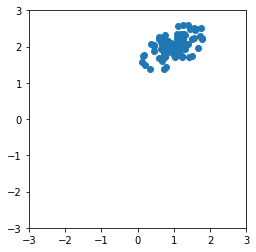

In [2]:
X = np.loadtxt("pca_2d.txt")
print("Shape of X:", X.shape)

plt.figure()
plt.plot(X[:,0], X[:,1], 'o')
plt.ylim(-3, 3)
plt.xlim(-3, 3)
ax = plt.gca()
ax.set_aspect('equal')

**Check your answers:**

First, we will need to translate the points of the dataset so that the mean for both axes is $0$.  Obtain ${\bf \hat{X}}$ such that each _column_ has an average of $0$.

*Hint: You can use [np.average](https://numpy.org/doc/stable/reference/generated/numpy.average.html) or [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) to compute the average of a vector. In particular, pass the entire dataset as the first argument then specify the axis which indexes the different points of data for the `axis` parameter to obtain the 'average' data point. Then you can use the original dataset to subtract it---no loops needed!*

Store this shifted dataset as `X_hat`.

In [17]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
X_hat = X - np.average(X, axis=0)

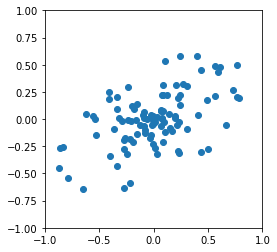

In [18]:
plt.plot(X_hat[:,0], X_hat[:,1], 'o')
plt.ylim(-1, 1)
plt.xlim(-1, 1)
ax = plt.gca()
ax.set_aspect('equal')

**Check your answers:**

Now, we can find the eigenvectors of ${\bf \hat{X}}^T{\bf \hat{X}}$ using the ${\bf V}$ matrix from the SVD of ${\bf \hat{X}}$.

Make sure you compute the *reduced* SVD, not the full one, since the full SVD will take a long time to finish.

Save the result from the SVD as the variables `U`, `S` and `Vt`. Recall that `U` and `Vt` are 2d numpy arrays with the orthogonal matrices and `S` is a 1d numpy array with the singular values. Further, save the transpose of the last output (`Vt`) as `V`.

In [27]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
U,S,Vt=la.svd(X_hat, full_matrices=False)
V = Vt.T

We can plot the columns of ${\bf V}$ scaled by the singular values to see the principal components scaled by their relative importance.

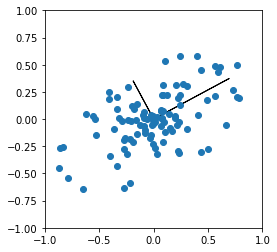

In [28]:
plt.plot(X_hat[:,0], X_hat[:,1], 'o')
plt.ylim(-1, 1)
plt.xlim(-1, 1)
ax = plt.gca()
ax.set_aspect('equal')

arrow_scale = 1.0 / 5.0
plt.arrow(0, 0, V[0, 0] * S[0] * arrow_scale, V[1, 0] * S[0] * arrow_scale)
plt.arrow(0, 0, V[0, 1] * S[1] * arrow_scale, V[1, 1] * S[1] * arrow_scale)

**Check your answers:**

To see the effect of the dimensionality reduction, create a matrix ${\bf V}_{\text{trunc}}$ that contains the first column of ${\bf V}$ in the first column, and only $0$ in the second column.

$$ {\bf V}_{\text{trunc}} = \begin{bmatrix} \vert & \vert \\ {\bf v}_1 & 0 \\ \vert & \vert \end{bmatrix} $$

Store this as `V_trunc`.

*Hint: Use `V_trunc = V.copy()` if your approach uses `V` to initialize `V_trunc`.*

In [30]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
V_trunc = V.copy()
V_trunc[:,1] = np.zeros(V_trunc.shape[0])

Now, we can use ${\bf V}_{\text{trunc}}$ to project ${\bf \hat{X}}$ onto only the first principal component.

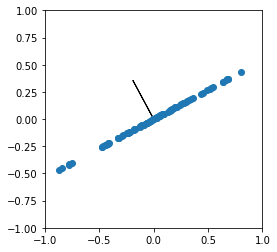

In [31]:
# Project the columns of X_hat into the V_trunc space
X_hat_pcspace = X_hat @ V_trunc
# Transform back into R^2
X_hat_proj = X_hat_pcspace @ V.T

plt.plot(X_hat_proj[:,0], X_hat_proj[:,1], 'o')
plt.ylim(-1, 1)
plt.xlim(-1, 1)
ax = plt.gca()
ax.set_aspect('equal')

arrow_scale = 2.0 / 5.0
plt.arrow(0, 0, V[0, 0] * arrow_scale, V[1, 0] * arrow_scale)
plt.arrow(0, 0, V[0, 1] * arrow_scale, V[1, 1] * arrow_scale)

PCA gives us a set of orthogonal basis vectors ordered by the relative "variance" of our data.  By keeping the first principal component we have compressed our data to only one coordinate but we still retain a (relative) lot of information.  What if we were to keep only the second component?

**Try this:**

Create the matrix ${\bf V}_{\text{trunc,2}}$ that contains the second column of ${\bf V}$, and then project ${\bf \hat{X}}$ onto the second principal component. Store your result in `X_hat_proj_2`. You may reuse code from above.

In [32]:
print(V)

[[ 0.88082162 -0.47344827]
 [ 0.47344827  0.88082162]]


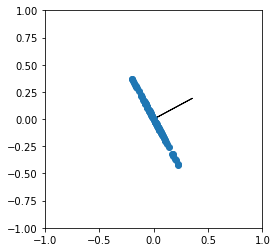

In [33]:
# define X_hat_proj here
V_trunc2 = V.copy()
V_trunc2[:,0] = np.zeros(V_trunc2.shape[0])
# Project the columns of X_hat into the V_trunc space
X_hat_pcspace2 = X_hat @ V_trunc2
# Transform back into R^2
X_hat_proj_2 = X_hat_pcspace2 @ V.T

# plot the projected X hat
plt.plot(X_hat_proj_2[:,0], X_hat_proj_2[:,1], 'o')
plt.ylim(-1, 1)
plt.xlim(-1, 1)
ax = plt.gca()
ax.set_aspect('equal')

arrow_scale = 2.0 / 5.0
plt.arrow(0, 0, V[0, 0] * arrow_scale, V[1, 0]  * arrow_scale)
plt.arrow(0, 0, V[0, 1] * arrow_scale, V[1, 1]  * arrow_scale)

We lose more information because the second principal component captures less of the "variance" of the data.

## PCA with Temperature Data

One interesting use case of PCA is to analyze trends in time series data; here, we have a dataset of daily temperatures for a year in six US cities.  This is given in the matrix `temperature`, where a row represents temperature data for a specific city, and columns represent temperatures on a certain day.  For example, column `0` contains the data for January 1st, column `1` represents January 2nd, and so on.

Text(0, 0.5, 'Daily Average Temperature (Fahrenheit)')

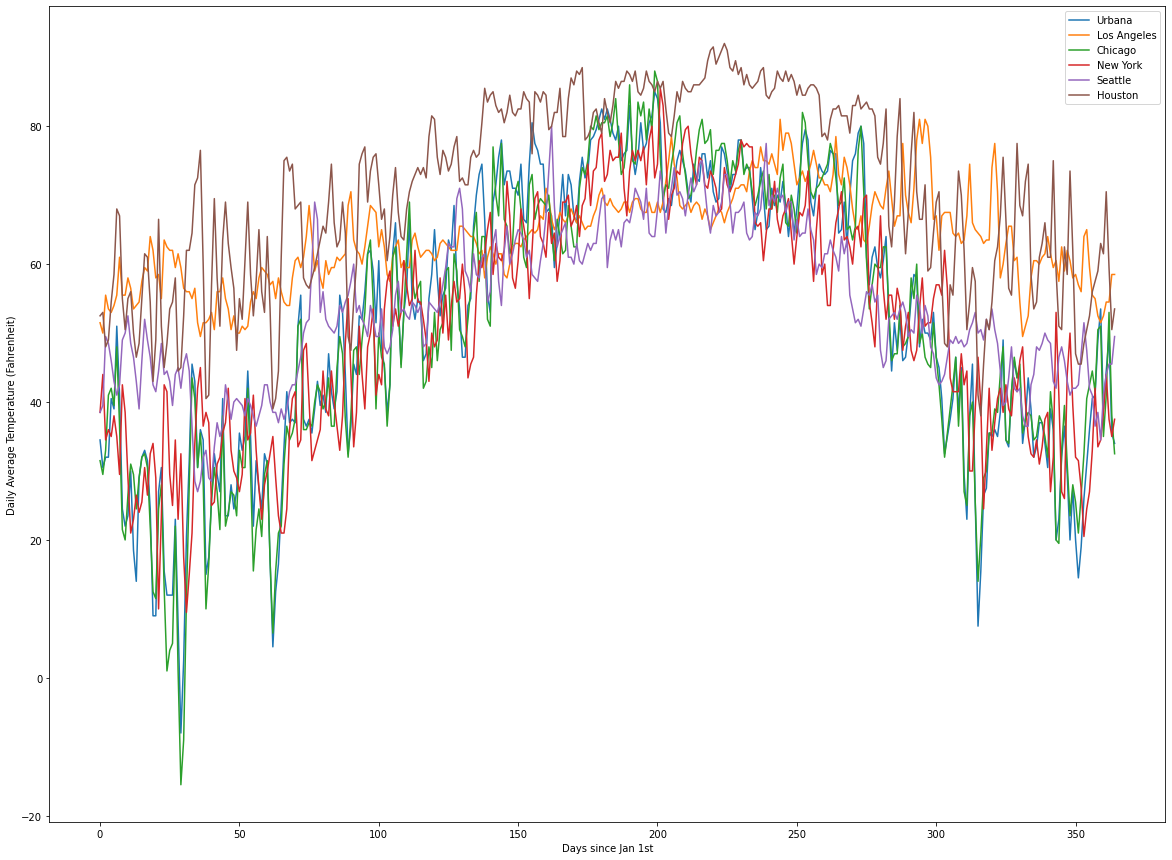

In [34]:
temperature = np.loadtxt("weather_data.txt")
labels = np.load("weather_labels.npy")

plt.figure(figsize=(20,15))
lines = plt.plot(temperature.T, '-')
plt.legend(iter(lines), labels)
plt.xlabel("Days since Jan 1st")
plt.ylabel("Daily Average Temperature (Fahrenheit)")

In [35]:
temperature.shape

(6, 365)

**Check your answers:**

Let's start off by getting the average temperature for each day.  Create the 365-length vector `temp_avg`, where each entry is the average temperature of all six cities on that specific day. 

Store the average temperature in `temp_avg`.

*Hint: Try to avoid writing a loop by using broadcasting.*

In [39]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
temp_avg = np.average(temperature, axis=0)

Now plot the average temperature.

Text(0, 0.5, 'Daily Average Temperature (Fahrenheit)')

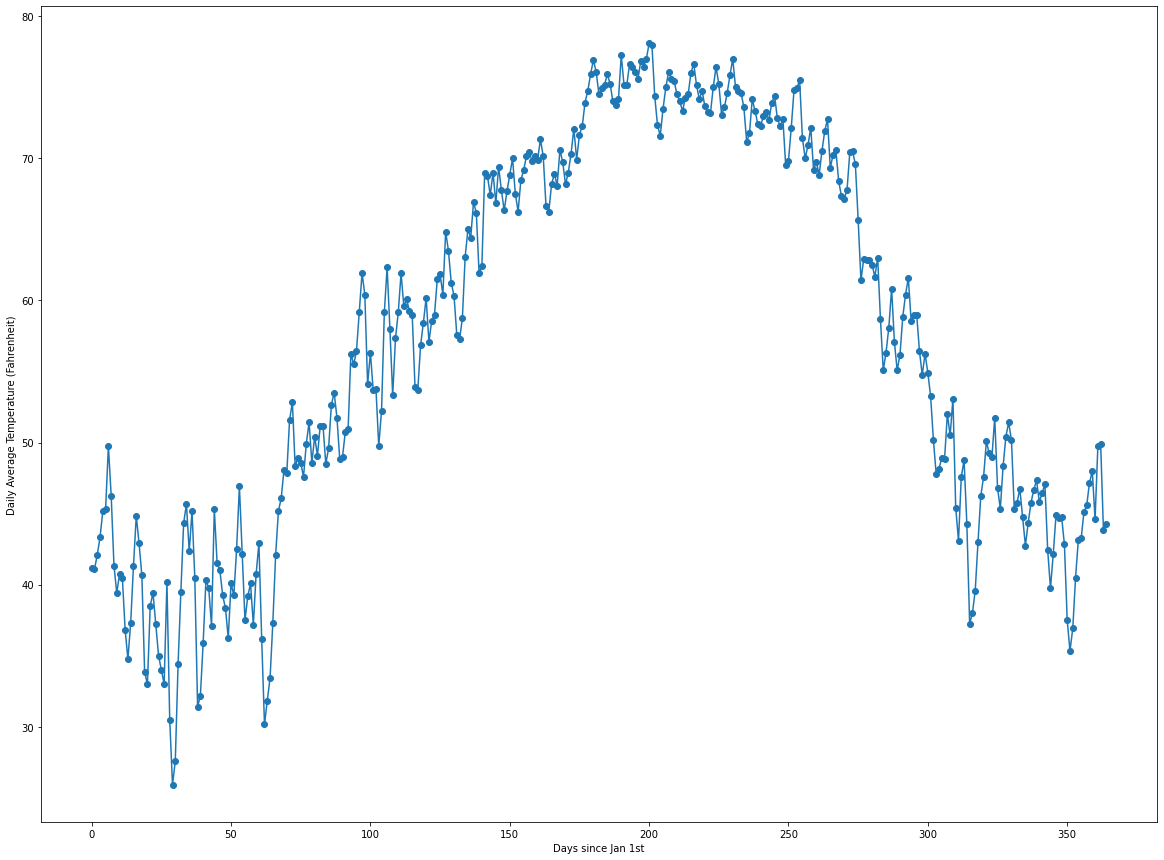

In [40]:
plt.figure(figsize=(20,15))
plt.plot(temp_avg, 'o-')
plt.xlabel("Days since Jan 1st")
plt.ylabel("Daily Average Temperature (Fahrenheit)")

**Check your answers:**

Recall we can only perform PCA on a dataset with zero mean, so subtract the average (computed above) from each row. 

Save this as `temp_noavg`.

In [41]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
temp_noavg = temperature - temp_avg

Text(0, 0.5, 'Daily Average Temperature (Fahrenheit)')

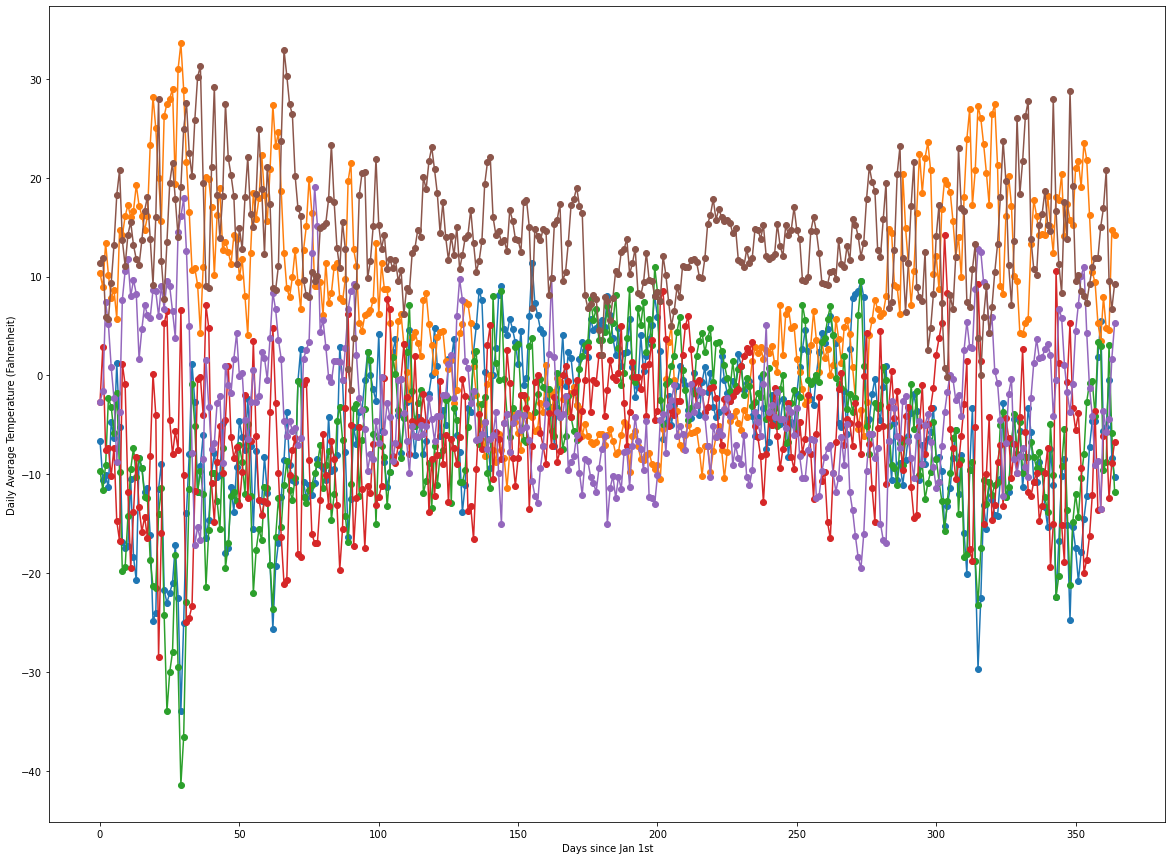

In [42]:
plt.figure(figsize=(20,15))
plt.plot(temp_noavg.T, 'o-')
plt.xlabel("Days since Jan 1st")
plt.ylabel("Daily Average Temperature (Fahrenheit)")

**Check your answers:**

Now we can compute the principal components.

Make sure you compute the *reduced* SVD, not the full one, since the full SVD will take a long time to finish.

Save the result from the SVD as the variables `U_temp`, `S_temp` and `Vt_temp`. Recall that `U_temp` and `Vt_temp` are 2d numpy arrays with the orthogonal matrices and `S_temp` is a 1d numpy array with the singular values. Further, save the transpose of the last output (`Vt_temp`) as `V_temp`.

In [43]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
U_temp, S_temp, Vt_temp = la.svd(temp_noavg, full_matrices=False)
V_temp = Vt_temp.T

The principal components here represent weather trends, stored in the columns of ${\bf V}$.  Plot the first two columns of ${\bf V}$.

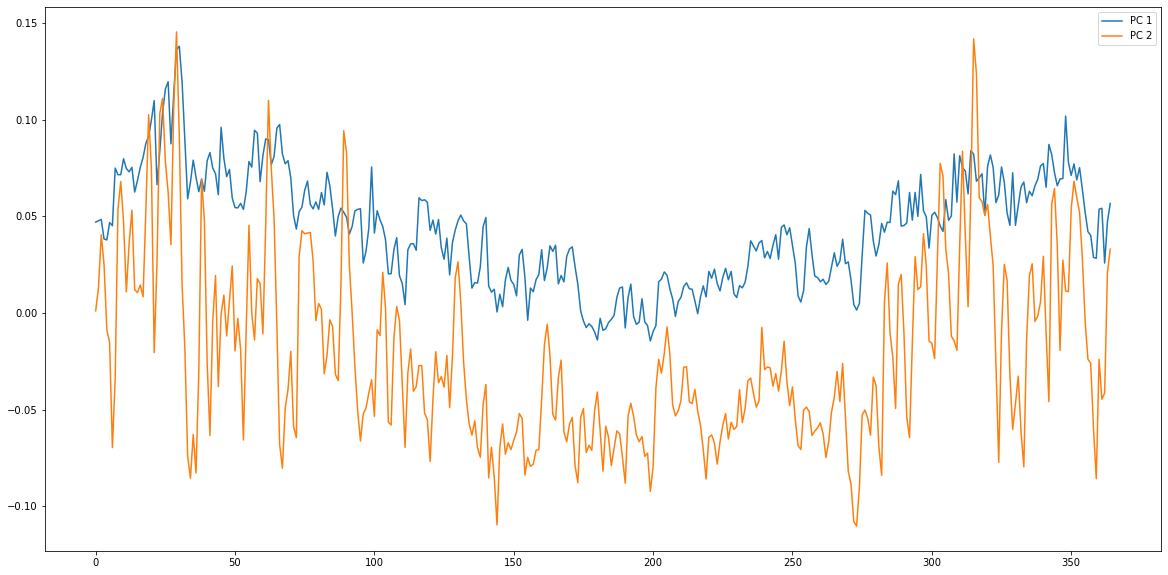

In [44]:
n = 2
plt.figure(figsize=(20,10))
lines = plt.plot((V_temp[:,:n] ), '-')
plt.legend(iter(lines), map(lambda x: f"PC {x}", range(1,6)))

Do these components make sense?  The principal components here represent deviation from the average; our average temperature dips in the winter and peaks in the summer, so the first principal component represents climates that are relatively static year-round (it compensates by having dips in the opposite directions).  Try to play around with plotting different principal components to see what sort of plots you get.

You can also use a bar plot to visualize this data. Since the $i$-th column of $\mathbf{V}$ describes the projection of each attribute onto the principal direction, we can say that a principal component is a linear combination of all of the attributes, and the weights are the entries of the $\mathbf{V}$ column:

<BarContainer object of 365 artists>

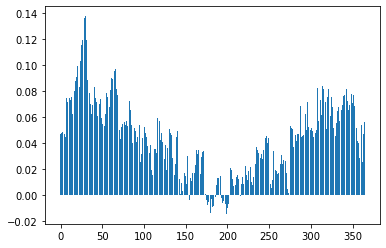

In [45]:
plt.bar(np.arange(365),V_temp[:,0])

## Eigenfaces

As we have broken down temperature data in the previous section, we can use a similar approach to face detection by introducing a concept called *eigenfaces*.  We will be using AT&T Laboratories Cambridge's (previously known as Olivetti Research Laboratory) ["Database of Faces"](https://web.archive.org/web/20180802044943/http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html) in this section.  This is a set of grayscaled face images, each normalized to the same resolution and each face taking up the same relative amount of area in each image.

In [47]:
import eigenfaces
(face_shape, faces) = eigenfaces.load_face_dataset()
num_faces = len(faces)
print(f'Loaded {num_faces} faces.')

Loaded 400 faces.


Note that each image has the shape defined in `face_shape`

In [48]:
face_shape

(112, 92)

However, each face is a flattened row in the large faces matrix. Let's take a look at the first "face":

In [49]:
faces[0].shape

(10304,)

To display an individual face, we will have to *reshape* it back into a rectangular image that we can then pass to `matplotlib`.

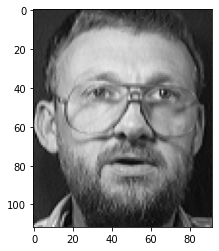

In [50]:
each_face = faces[0].reshape(face_shape)
plt.imshow(each_face, cmap="gray")

We can take a look at some of the images:

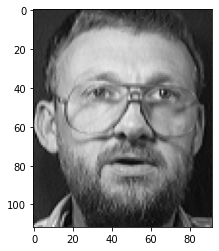

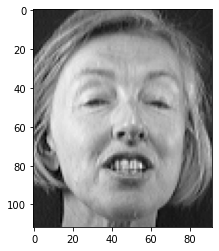

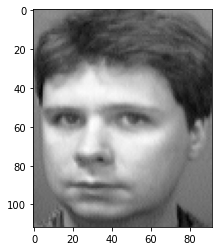

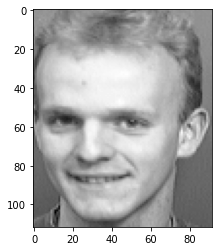

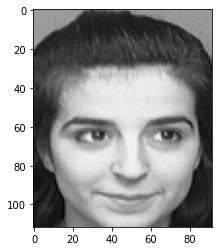

In [51]:
for i in range(0, 50, 10):
    plt.figure()
    each_face = faces[i].reshape(face_shape)
    plt.imshow(each_face, cmap="gray")

**Try this:**

First, let's compute the average face so that we can subtract it from our `faces` array.  

Save this into `face_avg`.

In [59]:
face_avg = np.average(faces, axis=0)

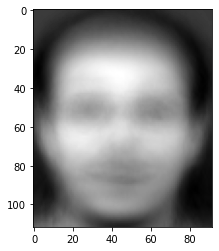

In [60]:
plt.imshow(face_avg.reshape(face_shape), cmap="gray")

**Try this:**

Now, subtract this average from each row in the faces dataset so that our data is zero-meaned.  

Save this as `faces_noavg`.

In [61]:
faces_noavg = faces - face_avg

We can now display the faces with the mean subtracted, the faces should be noticeably different but still recognizable.

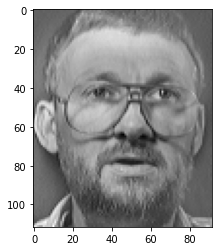

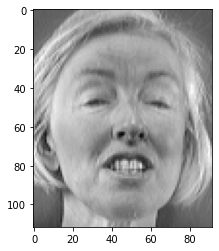

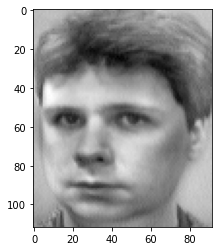

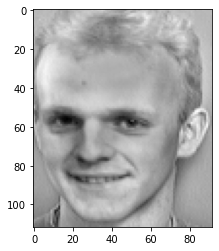

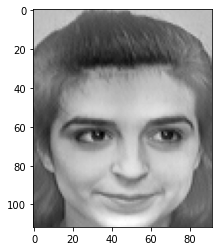

In [62]:
for i in range(0, 50, 10):
    plt.figure()
    plt.imshow(faces_noavg[i].reshape(face_shape), cmap="gray")

After computing the zero-meaned dataset, we can perform PCA on the faces.  The columns of $V$ (denoted as `V_faces` in our code) will contain a set of standard "face components" that we can use to describe each face &mdash; here we will display the first 10 components for you.

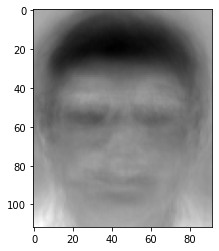

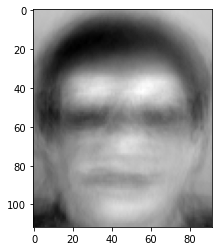

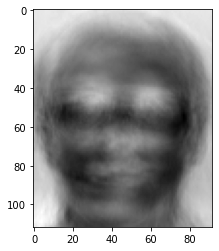

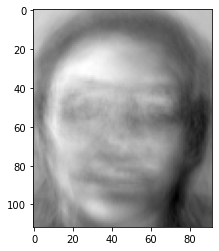

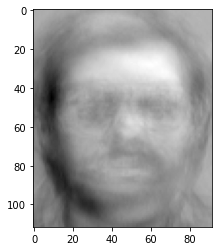

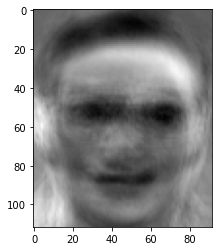

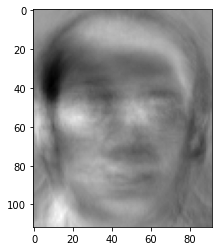

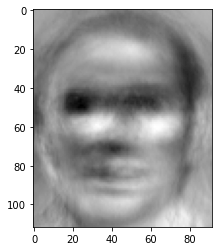

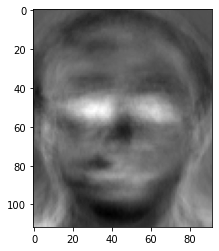

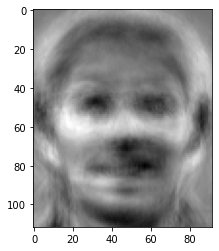

In [63]:
U_faces, S_faces, Vt_faces = la.svd(faces_noavg, full_matrices=False)
V_faces = Vt_faces.T

for i in range(10):
    plt.figure()
    plt.imshow(V_faces[:,i].reshape(face_shape), cmap="gray")

Some of the face components above look a bit spooky... but these are the parts that are shared between each face in our dataset.  We can pick out a single face and see how it is constructed.

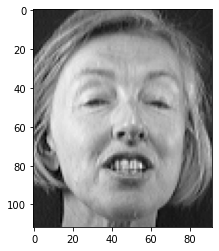

In [68]:
n = 10
plt.imshow(faces[n].reshape(face_shape), cmap="gray")

By converting this face into the eigenface basis, we can see how it is made up of each component.  You can see that the first components are used much more heavily than the later components, which should match our intuition that earlier principal components capture much more of the dataset variance.

[-5.2 -0.4 -4.8  0.7 -3.4 -0.5 -1.1 -3.3 -0.4  4.2 -0.5  0.  -1.2  3.2
  3.2  2.7  0.5 -1.8  0.2 -1.7 -1.3 -0.5  0.4  0.9  1.7  1.8 -1.5 -3.1
  1.3  1.3 -0.7 -1.4  1.1  2.   1.5  0.  -0.6  1.6  0.7  0.1 -0.4 -0.8
  1.8 -1.  -0.8 -0.1 -1.7 -0.4 -1.3  0.2  0.2 -1.4  0.5  1.  -1.  -1.4
  0.3  0.  -0.3  1.2 -1.9  1.1 -0.8 -0.6  0.4 -0.   0.4 -0.7 -0.1  0.5
  0.2  1.4  0.7 -0.8  0.6 -0.2 -0.2  0.1  0.3 -0.6  0.2  0.  -0.5 -0.2
 -0.3 -1.4 -0.4 -0.9 -0.1 -0.1 -0.1  0.2 -0.2  0.4  0.3  0.1  0.5 -0.
  0.1 -1.  -0.6  0.6  0.4  0.7  0.1 -0.3  1.2  0.2 -0.1  0.2  0.  -0.3
 -0.   1.1  0.6  0.7  0.2  1.1  0.1 -1.6 -0.1  0.4  0.7 -0.2 -0.3 -0.2
  0.7  0.7 -0.2 -0.4 -0.4  0.4  0.1  0.3  0.  -0.1 -0.5 -1.1 -0.2  0.7
  0.4  0.3 -0.4 -0.1 -0.5  0.1 -0.2 -0.4 -0.2  0.1 -0.4  0.2  0.3 -0.3
 -0.7  0.4 -0.1  0.8  1.1  0.1  0.2  0.2 -0.3  0.2  0.7  0.1 -0.1  0.4
 -0.3  0.2 -0.2  0.3 -0.9  0.1  0.5 -0.1  0.5 -0.1 -0.9 -0.1 -0.3 -0.2
 -0.7 -0.3 -0.9 -0.6  0.3  0.8 -0.5  0.2 -0.4 -0.5  0.6 -0.5 -0.5 -0.2
  0.1 -

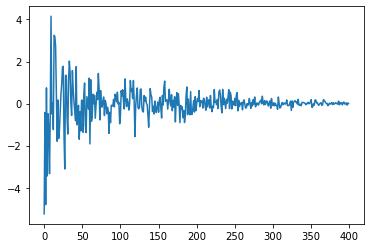

In [69]:
face_basis = (faces[n] - face_avg) @ V_faces
print(np.round(face_basis, 1))

plt.figure()
plt.plot(face_basis)

### Face Detection with Eigenfaces

Now that we have a dataset of faces and their respective components, we can perform face detection to try matching a new, unknown image with one that we have seen already.  Here we have a face that is similar to one in our dataset, but not exactly the same (our model has not been trained on it).

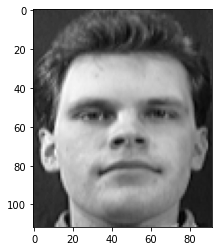

In [71]:
face_unknown = eigenfaces.load_unknown()
plt.imshow(face_unknown.reshape(face_shape), cmap="gray")

To identify this face, we will convert it into our *eigenface components* basis.  First, we will subtract the mean face from above from this face.  Subtract our *dataset's mean* from the unknown face, and save this as `unknown_noavg`.  Note that this may still have a nonzero mean with respect to *itself*.

In [74]:
unknown_noavg = face_unknown - face_avg

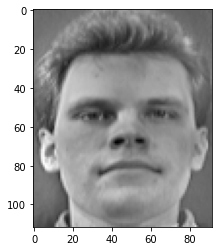

In [76]:
plt.imshow(unknown_noavg.reshape(face_shape), cmap="gray")

Now, we can convert into the eigenface basis.  We will also convert our faces dataset into the eigenface basis so that we can match this unknown face.

In [79]:
unknown_basis = unknown_noavg @ V_faces
faces_basis = faces_noavg @ V_faces

**Check your answers:**

To match the face, find the existing face in `faces_basis` that is "closest" to the unknown face.  Loop through each face in `faces_basis` and find which has the smallest "difference" to our unknown face in the eigenface basis.  You can use `la.norm()` on the difference between two vectors to get a distance.  

Save the index with the smallest distance as `n_faces`.

In [86]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
mindist = 1000000000
i = 0
n_faces = 0
for face in faces_basis:
    dist = la.norm(unknown_basis - face)
    if (dist < mindist):
        mindist = dist
        n_faces = i
    i+=1
    

Let's plot the image that we matched, did your code detect the face correctly?  If we wanted to extend this to a proper face detection routine, we could map each face in our dataset to that respective person's information &mdash; this would allow us to detect who a person is based on their face.

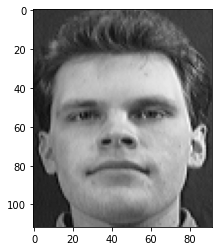

In [87]:
plt.imshow(faces[n_faces].reshape(face_shape), cmap="gray")